## Обзор

### Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st 

### Загрузка данных

In [2]:
game_data = pd.read_csv('/datasets/games.csv')
game_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


- Заголовки данных написаны в строчными и прописными буквами. Их нужно привести к общему формату. Для этого достаточно привести все названия к нижнему регистру. Хорошо что слова уже написаны через символ '_'.
- Значения в колонках 'Critic_Score' и 'User_Score' отличаются на порядки. Их нужно привести к одному знаменателю, т.е. к единому масштабу, чтобы их можно было корректно сравнивать.

### Общая информация

In [3]:
game_data.info()

print(
    '',
    'Список колонок содержащих пропуски:', 
    game_data.loc[:, game_data.isna().sum() > 0].columns.to_list(),
    sep='\n'
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Список колонок содержащих пропуски:
['Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating']


- В колонках ['Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating'] есть пропуски.
- Тип данных 'Year_of_Release' float64 из-за наличия пропусков (т.к. значение NaN типа float). Для преобразования нужно использовать тип Int64. Он допускает наличие пропусков в серии.
- Тип данных 'User_Score' object и его нужно преобразовать в number.

### Описательные статистики

In [4]:
game_data.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


- В колонке 'User_Score' самым популярным значением оказалась строка 'tbd'. Поэтому тип данных определился как object. 'tbd' - To Be Determined, т.е. будет определено позже. Я понимаю это, как для подсчета баллов еще не набралось достаточного количества пользовательских отзывов. Посему, считаю актуальным заменить значением NaN и преобразовать этот признак во float.
- в колонках 'Platform', 'Genre', 'Rating' относительно немнго уникальных значений. Потенциально эти категориальные признаки можно использовать для группировки значений. 

In [5]:
game_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


- В колонках с продажами есть выбросы. Нули в этих колонках я буду трактовать как отсутвие продаж. Игра могла быть беслатной или не продавалась в данном регионе.
- Минимальный балл оставленный критиками - 13

### Выводы

- Формат заголовков нужно привести к нижнему регистру
- Значения в колонках 'Critic_Score' и 'User_Score' отличаются на порядки. Их нужно привести к одному знаменателю, т.е. к единому масштабу, чтобы их можно было корректно сравнивать.
- В колонках ['Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating'] есть пропуски.
- В колонке 'Year_of_Release' значение tbd (To Be Determind, будет определено позже в связи с недостатком информации) нужно заменить NaN, а затем преобразовать в Int64.
- В колонках с продажами есть выбросы.
- Половина игр сделана за 26 лет с 1980, а половина за 10 лет с 2007. Технологии шагнули вперед и возможно инетерес к играм тоже вырос.

## Предобработка

### Форматирование заголовков

In [6]:
game_data = game_data.rename(columns=lambda x: x.lower())

### Замена tbd

In [7]:
tbd_cond = game_data['user_score'] != 'tbd' 
game_data['user_score'] = game_data['user_score'].where(tbd_cond, np.nan)

### Обработка пропусков

Посмотрим, есть ли заисимость 'rating' от разных платформ, чтобы узнать можно ли вопользоваться этой информацией для восстановления значений 'rating'.

In [8]:
game_data.pivot_table(index='rating', columns='platform', values='na_sales', aggfunc='count')

platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
rating,,,,,,,,,,,,,,,,,
AO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
E,92.0,3.0,876.0,426.0,230.0,138.0,116.0,556.0,211.0,54.0,188.0,22.0,503.0,35.0,247.0,248.0,45.0
E10+,76.0,NaN,259.0,25.0,31.0,76.0,NaN,125.0,140.0,40.0,106.0,28.0,242.0,42.0,168.0,31.0,31.0
EC,NaN,NaN,2.0,NaN,1.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
K-A,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M,12.0,1.0,10.0,7.0,38.0,256.0,20.0,223.0,265.0,76.0,49.0,33.0,33.0,15.0,294.0,161.0,70.0
RP,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T,48.0,10.0,126.0,64.0,169.0,297.0,71.0,576.0,336.0,85.0,201.0,68.0,222.0,13.0,343.0,292.0,40.0


Из таблицы видно, что каждое значение 'rating' может всречаться для самых разных платформ. Хотя есть платформы, которые чаще соответсвуют определенному значению 'rating', всеже не единственному. Я считаю, что эта информация не позволяет "хорошо" восстановить значения колонки 'rating'. Слишком часто можно ошибиться.

In [9]:
print(
    "Доля строк с пропусками хотя бы в одной из колонок 'name', 'platform', 'year_of_release', 'genre':", 
    '{:.2%}'.format(game_data.iloc[:, :4].isna().any(axis=1).sum() / game_data.shape[0])
)

Доля строк с пропусками хотя бы в одной из колонок 'name', 'platform', 'year_of_release', 'genre': 1.62%


Так как доля пропусков, для выше указанных колонок, крайне мала, их удаление не повлияет на дальнейший анализ. Что я беспощадно и сделаю.

In [10]:
game_data = game_data.dropna(subset=['name', 'platform', 'year_of_release', 'genre']).reset_index(drop=True)

Пропуски остались в колонках 'critic_score', 'user_score', 'rating'. Заменять медианой я их не стану потому, что пропусков слишком много. Какого-то другого, возможно более осмысленного подхода, я не знаю. Поэтому оставлю эти пропуски.

### Преобразование типов

Приведем значения в колонке 'user_score' к масштабу значений 'critic_score'. Для этого умножу значения в 'user_score' на 10.

In [11]:
game_data['user_score'] = pd.to_numeric(game_data['user_score']) * 10
game_data['user_score'].agg(['min', 'max'])

min     0.0
max    97.0
Name: user_score, dtype: float64

Также я изменю масштаб колонок продаж. Умножу значения на 1000, тогда я смогу привести их к целочисленному типу. А исчесляться продажи станут тысячами вместо миллионов. Умножаю на 1000, а не на 100 чтобы потом не запутаться в масштабах.

In [12]:
sales_cols =['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
game_data.loc[:, sales_cols] = game_data.loc[:, sales_cols] * 1000

In [13]:
game_data = game_data.astype({
    'year_of_release': 'int',
    'na_sales': 'int',
    'eu_sales': 'int',
    'jp_sales': 'int',
    'other_sales': 'int',
    'critic_score': 'Int64',
    'user_score': 'Int64'
})

In [14]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null int64
eu_sales           16444 non-null int64
jp_sales           16444 non-null int64
other_sales        16444 non-null int64
critic_score       7983 non-null Int64
user_score         7463 non-null Int64
rating             9768 non-null object
dtypes: Int64(2), int64(5), object(4)
memory usage: 1.4+ MB


- После преобразования типов все числовые значения имеют целочисленный тип. 
- Изменен масшатб 'user_score'. Теперь эти значения соответствуют 100 бальной системе. Как и 'critic_score'.
- Изменен масштаб колонок продаж. Тпереь значения продаж исчисляются тысячами.

### Общая сумма продаж

In [15]:
game_data['total_sales'] = game_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

### Выводы

In [16]:
game_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76,80,E,82540
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,NaN,NaN,NaN,40240
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82,83,E,35520
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80,80,E,32770
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,NaN,NaN,NaN,31380
5,Tetris,GB,1989,Puzzle,23200,2260,4220,580,NaN,NaN,NaN,30260
6,New Super Mario Bros.,DS,2006,Platform,11280,9140,6500,2880,89,85,E,29800
7,Wii Play,Wii,2006,Misc,13960,9180,2930,2840,58,66,E,28910
8,New Super Mario Bros. Wii,Wii,2009,Platform,14440,6940,4700,2240,87,84,E,28320
9,Duck Hunt,NES,1984,Shooter,26930,630,280,470,NaN,NaN,NaN,28310


- В колонке 'user_score' значение tab заменено значением NaN.
- Строки с пропусками в колонках 'name', 'platform', 'year_of_release', 'genre' - удалены.
- Пропуски в колонках 'critic_score', 'user_score', 'rating' остались.
- После преобразования типов все числовые значения имеют целочисленный тип. 
- Изменен масшатб 'user_score'. Теперь эти значения соответствуют 100 бальной системе. Как и 'critic_score'.
- Изменен масштаб колонок продаж. Тпереь значения продаж исчисляются тысячами.
- Подсчитана общая сумма продаж 'total_sales'.

Данные подготовлены к анализу. Пропуски остались всего в трех колонках.

## Анализ

### Количество игр по годам

In [17]:
pd.__version__

'0.25.1'

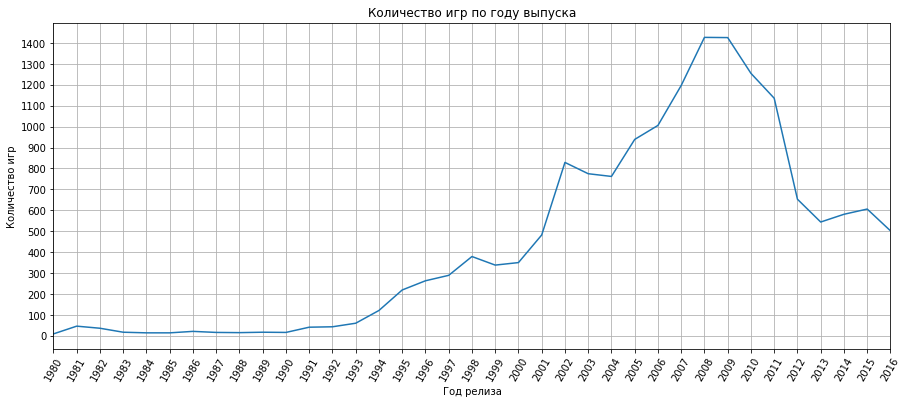

In [18]:
ax = game_data.groupby('year_of_release')['name'].count().plot(
    grid=True,
    figsize=(15, 6),
    yticks=list(range(0, 1500, 100)),
    xticks=list(range(1980, 2017)),
#     xlabel='Год релиза',
#     ylabel='Количество игр',
    title='Количество игр по году выпуска',
    rot=60
)
ax.set_xlabel('Год релиза')
ax.set_ylabel('Количество игр')
print(end='')

С 1990 года по 2008 год наблюдается рост производства игр, а с 2009 года - спад. Перемена тренда может быть вызвана потерей интереса к играм в целом, внимание публики могли перетянуть на себя другие сервисы  (например, инстаграм появился в 2010 году), а может и кризисом технологий. Во всяком случае в 2008-2009 гг.  что-то сильно изменилось и более ранние периоды скорее всего уже не важны.

### Продажи по платформам

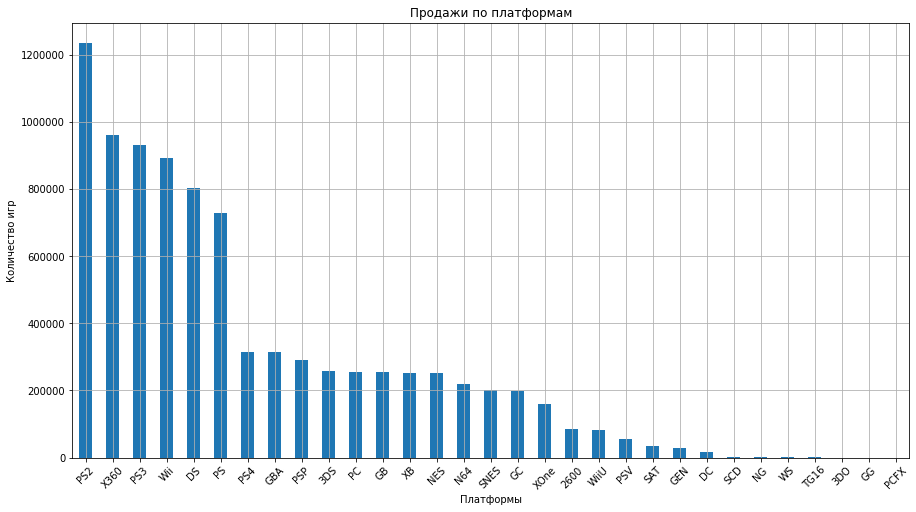

In [19]:
sale_platforms = game_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

ax = sale_platforms.plot.bar(
    grid=True,
    figsize=(15, 8),
#     xlabel='Платформы',
#     ylabel='Количество игр',
    title='Продажи по платформам',
    rot=45
)
ax.set_xlabel('Платформы')
ax.set_ylabel('Количество игр')
print(end='')

На графике суммарных продаж по платформам - первые шесть стобцов слева сильно выделяются среди прочих. Платформы соотвествующие этим значениям: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']  составляют топ-6 платформ по суммарному объему продаж с 1980 г. 

### Топовые платформы 

Средний срок жизни платформы по всем данным: 7.0 лет
Средний срок жизни топовых платформ: 11.0 лет


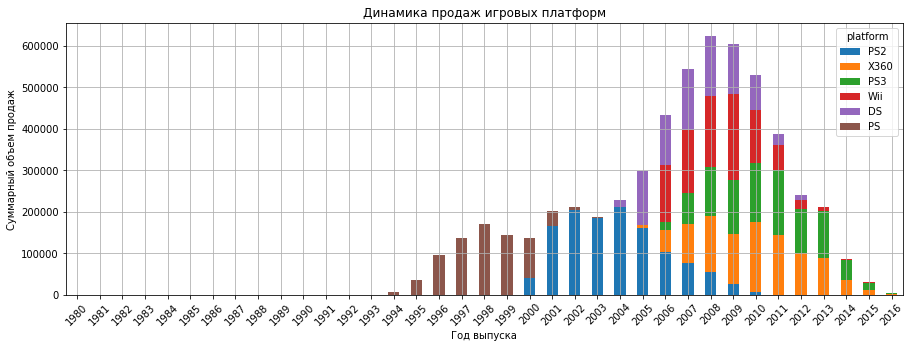

In [20]:
# top-6 platform names
top_platforms_names = sale_platforms.index[:6].to_list()


platforms_sales_volume = game_data.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).astype('Int64')

# Define platform live period
print(
    'Средний срок жизни платформы по всем данным: {} лет'.format( 
    platforms_sales_volume.count().median()
))

print(
    'Средний срок жизни топовых платформ: {} лет'.format( 
    platforms_sales_volume.loc[:, top_platforms_names].count().median()
))

ax = platforms_sales_volume.loc[:, top_platforms_names].plot.bar(
    grid=True, 
    figsize=(15,5),
    xticks=list(range(1980, 2018)), 
    rot=45,
#     xlabel='Год выпуска',
#     ylabel='Суммарный объем продаж',
    title='Динамика продаж игровых платформ',
    stacked=True
)
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Суммарный объем продаж')
print(end='')

На графике видно как увеличиваются объемы продаж каждой из топовых платформ, затем наступает пик популярности, а потом объемы продаж падают и платформа покидает рынок. Замечу, что самые свежие платформы прошли свой пик продаж также в 2009-2010 гг. При этом срок жизни платформы на рынке среди всей массы в среднем 7 лет, а для более успешных представителей из топ-6 - 11 лет.

### Актуалочка 

Исходя из выше рассмотренного я думаю, что актуальным периодом для дальнейшего анализа является период с 2009 года. Это переломный год в трендах и пик популярности топ-6 самых продаваемых платформ, а также начало спада их объемов продаж.

In [21]:
period_boundary = 2009

# Select actual data
actual_data = game_data.query("year_of_release >= @period_boundary")
actual_platform_data = platforms_sales_volume.loc[platforms_sales_volume.index >= period_boundary]
# Drop absolute NaN columns
actual_platform_data = actual_platform_data.dropna(axis=1, how='all')

Рейтинг платформ по совокупному объему продаж на 2016 год:


platform
PS4     69250
XOne    26150
3DS     15140
PC       5250
WiiU     4600
PSV      4250
PS3      3600
X360     1520
Wii       180
PSP         0
PS2         0
DS          0
Name: 2016, dtype: Int64

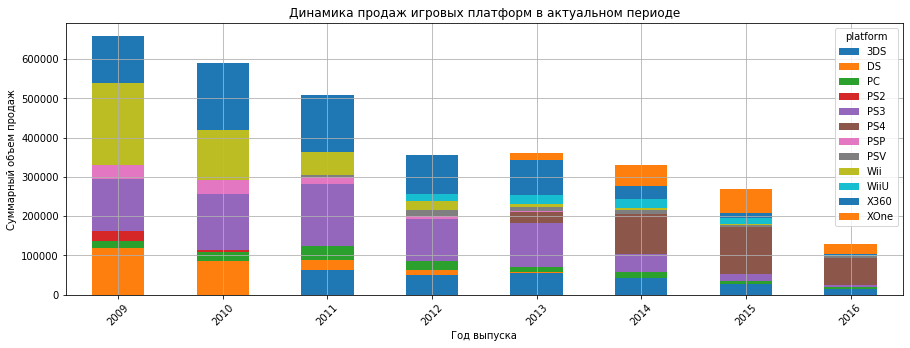

In [22]:
# Draw distribution of actual data
ax = actual_platform_data.fillna(0).plot.bar(
    grid=True, 
    figsize=(15,5),
    rot=45,
#     xlabel='Год выпуска',
#     ylabel='Суммарный объем продаж',
    title='Динамика продаж игровых платформ в актуальном периоде',
    stacked=True
)
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Суммарный объем продаж')
print('Рейтинг платформ по совокупному объему продаж на 2016 год:')
actual_platform_data.fillna(0).loc[2016].sort_values(ascending=False)

По графику и составленному рейтингу платформ по совокупному объему продаж на 2016 год можно сделать следующие выводы:
- Платформы ['DS', 'PS2', 'PSP'] уже покинули рынок.
- Платформы ['3DS', 'PC', 'WiiU', 'PSV', 'PS3', 'X360', 'Wii'] - или умирающие (тренд на снижение стоимости) или малоприбыльные.
- Платформе  'PS4' и 'XOne' - лидеры рейтинга. Этим платформам 4 года, именно они и есть кандидаты на рассмотрение. Возможно в следующем году, они  поднимутся к пику своей популярности и максимальной прибыли на следующие пару-тройку лет.

In [23]:
candidates = ['PS4', 'XOne']

### Ящики с усами

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


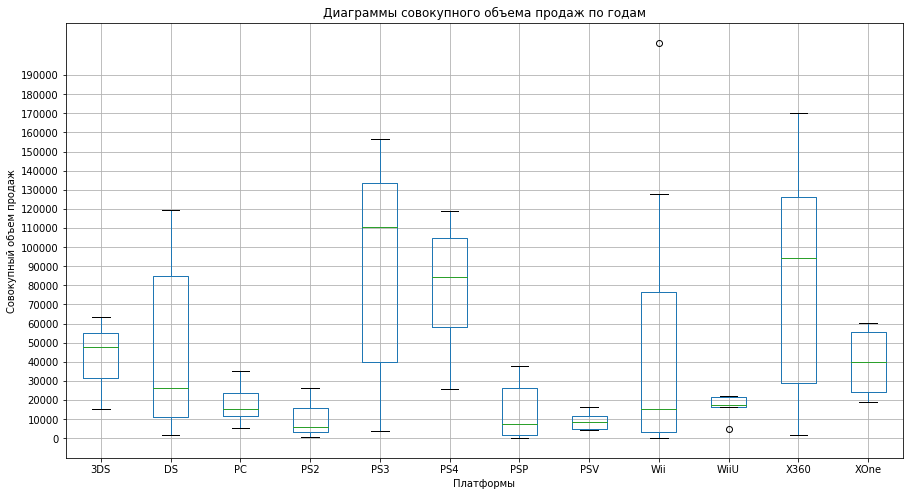

In [24]:
ax = actual_platform_data.plot.box(
    figsize=(15, 8), 
    grid=True,
    yticks=np.arange(0, 2e5, 1e4),
#     xlabel='Платформы',
#     ylabel='Совокупный объем продаж',
    title='Диаграммы совокупного объема продаж по годам'
)
ax.set_xlabel('Платформы')
ax.set_ylabel('Совокупный объем продаж')
print(end='')

Ящики с усами показывают совокупные объемы продаж в разрезе лет. Нижняя часть говорит о стартовой прибыли, 50-процентиль - о медийной стоимости за все годы продаж на рынке, а верхние части ящиков с усами обозначают масимальные прибыли за годы продаж. Среди платформ есть платформы с небольшим средним объемом прибыли, но приличными суммами на пике популярности (например, Wii: средняя прибыль в районе 15,000, а масимальная в районе 130,000).


Рассматривая выбранных кандидатов 'PS4' и 'XOne', можно заключить следующее:
- У 'XOne' средняя выручка составляет 40,000 и имеет относительно небольшой разброс так, что все значения укладываются в отрезок от 20,000 до 60,000.
- С 'PS4' ситуация иная: среднее находится в районе 85,000 и выборка имеет больший разброс значений вплоть до 120,000 прибыли.

На этом этапе мне кажется, что ставка на 'PS4' прибыльнее, чем на 'XOne'. При условии, что нужно выбрать одну платформу. Потому, что даже минимальные продажи 'PS4' сопоставимы со средними и высокими продажами 'XOne'. Т.е. всего не более 25% продаж 'PS4' находятся в тех же пределах, что и все продажи 'XOne', а остальные выше и достигают 120,000 как я уже отмечал.

### Влияние оценок пользователей и критиков

In [25]:
actual_one = actual_data.query("platform == @candidates[0]")

Диаграмма рассеяния для совокупных продаж и отзывов платформы 'PS4'


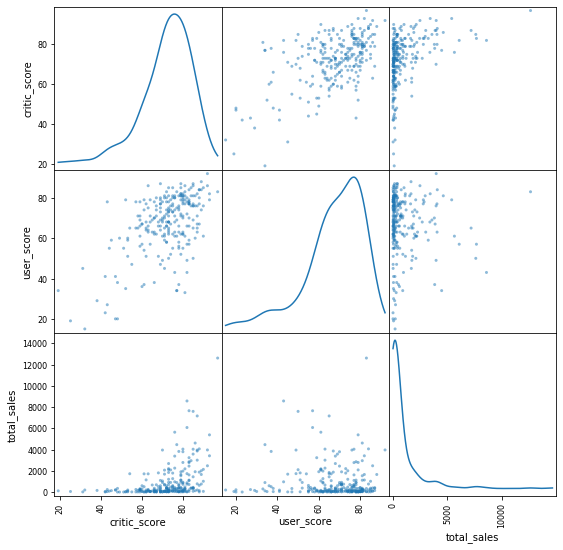

In [26]:
pd.plotting.scatter_matrix(
    actual_one[['critic_score', 'user_score', 'total_sales']].astype('float'),
    diagonal='kde',
    figsize=(9, 9),
)
print("Диаграмма рассеяния для совокупных продаж и отзывов платформы 'PS4'")

In [27]:
print("Корреляционная матрица между признаками свокупных продаж и отзывами для платформы 'PS4':")

actual_one[['critic_score', 'user_score', 'total_sales']].corr()

Корреляционная матрица между признаками свокупных продаж и отзывами для платформы 'PS4':


,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


- Чаще продаются игры с высокими оценками критиков и пользователей, и то, что больше как говорится "на сулху".
- Чем выше оценки критиков и пользователей, тем вероятнее продать дороже.
- Разброс точек на диграмме отзывов пользователей и продаж больше, чем у критиков. Т.е. ориентироваться стоит больше на оценки критиков, они точнее оценивают.
- Коррелиция между продажами и оценками критиков больше и составляет 0.4, чем между продажами и оценками пользователей. Но все таки 0.4 означает слабую степень линейной зависимости признаков.

### Жанры

actual_genre_groupes = game_data.query('year_of_release >= @period_boundary').groupby('genre')

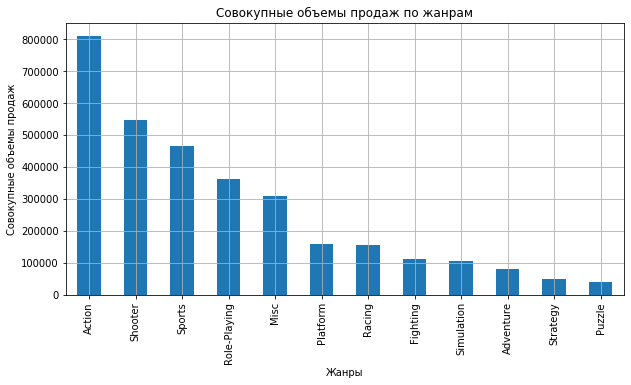

In [28]:
ax = actual_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot.bar(
    grid=True, 
    figsize=(10,5),
    title='Совокупные объемы продаж по жанрам',
#     xlabel='Жанры',
#     ylabel='Совокупные объемы продаж'
)
ax.set_xlabel('Жанры')
ax.set_ylabel('Совокупные объемы продаж')
print(end='')

Можно выделить топ-5 самых продаваемых игровых жанров Action, Shooter, Sport, Role-Playing, Misc. Эти жанры скорее всего связаны с активными игровыми действиями и высокой динамикой игры. 

Так же можно отметить и самые низкооплачиваемые жанры игр стратегии и пазлы. Это менее динамичные жанры, а еще игроку предстоит напрягать воображение, стратегическое мышление.

Platform, Racing, Fighting, Simulation, Adventure - тоже приносят сравнительно мало прибыли. 

### Выводы

Проведен анализ прибыли по продажам игр относитально платформ, зрительских симпатий (признаков critic_score и user_score) и жанров:
- С 2009 года наблюдается общее снижение количества производимых в год игр. Это момент смены тренда игрового производства с роста на спад.
- Среди игровых платформ можно выделить топ-6 самых продаваемых: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'] с 1980 по 2016 годы.
- Средний срок жизни платформы по всем данным: 7.0 лет
- Средний срок жизни топовых платформ: 11.0 лет
- Границей актульных данных выбран 2009 год. Данные более раннего периода - неактуальны.
- Выделены платформы кандидаты для инвестиций 'PS4' и 'XOne'. Этим платформам 4 года на конец 2016 и их пиковые продажи могут быть в следующие 2-3 года. При выборе одной платформы - рекомендую 'PS4' как более прибыльную, как в среднем так и по максимальной прибыли.
- Совокупный объем продаж имеет слабую корреляцию со значением 0.4 с отзывами критиков. Слабая линейная зависимость не позволяет прогнозировать прибыль на основе отзвов критиков. При этом чем выше оценки критиков, тем чаще игры на обозреваемой платформе продаются. Критики точнее пользователей оценивают игры.
- Выделил топ-5 самых продаваемых игровых жанров: Action, Shooter, Sport, Role-Playing, Misc, перечисленных в порядке убывания совокупных продаж.

## Портрет пользователя

### Популярные платформы

Топ-5 платформ:  ['X360', 'PS3', 'Wii', 'DS', 'PS4']


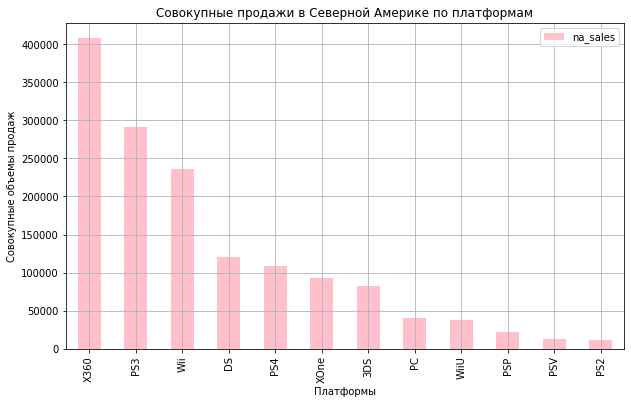

In [29]:
na_platform = actual_data[['platform', 'na_sales']].groupby('platform').sum()
na_platform = na_platform.sort_values(by='na_sales', ascending=False)
ax = na_platform.plot.bar(
    grid=True,
    figsize=(10, 6),
    title='Совокупные продажи в Северной Америке по платформам',
#     xlabel='Платформы',
#     ylabel='Совокупный объем продаж',
    color='pink'
)
ax.set_xlabel('Платформы')
ax.set_ylabel('Совокупные объемы продаж')
print('Топ-5 платформ: ', na_platform.index[:5].to_list())

В Северной Амерке топ-5 платформ по объему продаж составляют:  ['X360', 'PS3', 'Wii', 'DS', 'PS4']. При чем прибыли от продажи игр на платформах первой тройки ['X360', 'PS3', 'Wii'] явно преввышают остальные. 

Топ-5 платформ:  ['PS3', 'X360', 'PS4', 'Wii', 'PC']


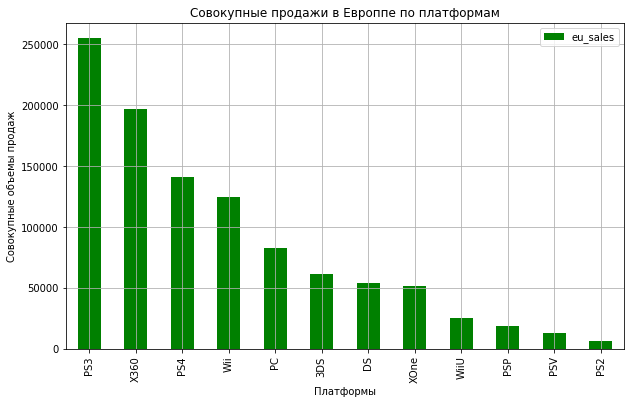

In [30]:
eu_platform = actual_data[['platform', 'eu_sales']].groupby('platform').sum()
eu_platform = eu_platform.sort_values(by='eu_sales', ascending=False)
ax = eu_platform.plot.bar(
    grid=True,
    figsize=(10, 6),
    title='Совокупные продажи в Европпе по платформам',
#     xlabel='Платформы',
#     ylabel='Совокупный объем продаж',
    color='green'
)
ax.set_xlabel('Платформы')
ax.set_ylabel('Совокупные объемы продаж')
print('Топ-5 платформ: ', eu_platform.index[:5].to_list())

Европейские топ-5 платформ по объему продаж составляют:  ['PS3', 'X360', 'PS4', 'Wii', 'PC'].

Топ-5 платформ:  ['3DS', 'PS3', 'DS', 'PSP', 'Wii']


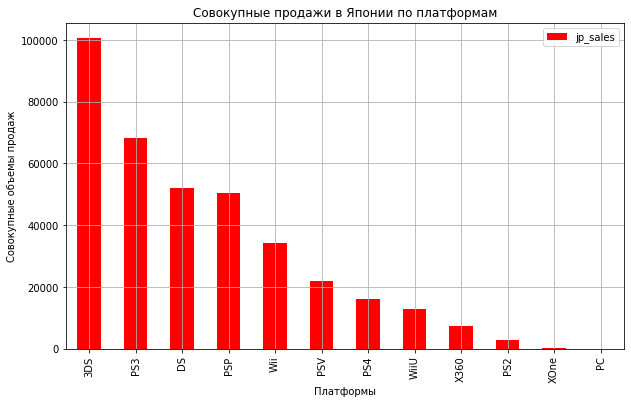

In [31]:
jp_platform = actual_data[['platform', 'jp_sales']].groupby('platform').sum()
jp_platform = jp_platform.sort_values(by='jp_sales', ascending=False)
ax = jp_platform.plot.bar(
    grid=True,
    figsize=(10, 6),
    title='Совокупные продажи в Японии по платформам',
#     xlabel='Платформы',
#     ylabel='Совокупный объем продаж',
    color='red'
)
ax.set_xlabel('Платформы')
ax.set_ylabel('Совокупные объемы продаж')
print('Топ-5 платформ: ', jp_platform.index[:5].to_list())

В Японии топ-5 платформ по объему продаж составляют:  ['3DS', 'PS3', 'DS', 'PSP', 'Wii']. 

Топ-5 платформ:  ['PS3', 'X360', 'PS4', 'Wii', 'DS']


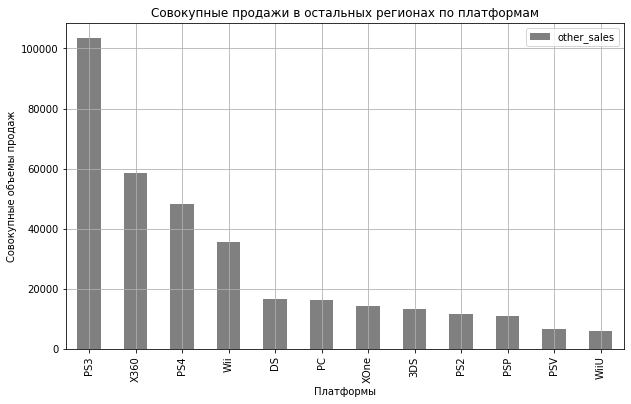

In [32]:
other_platform = actual_data[['platform', 'other_sales']].groupby('platform').sum()
other_platform = other_platform.sort_values(by='other_sales', ascending=False)
ax = other_platform.plot.bar(
    grid=True,
    figsize=(10, 6),
    title='Совокупные продажи в остальных регионах по платформам',
#     xlabel='Платформы',
#     ylabel='Совокупный объем продаж',
    color='grey'
)
ax.set_xlabel('Платформы')
ax.set_ylabel('Совокупные объемы продаж')
print('Топ-5 платформ: ', other_platform.index[:5].to_list())

В остальных регионах топ-5 платформ по объему продаж составляют:  ['PS3', 'X360', 'PS4', 'Wii', 'DS']. При чем 'PS3' - явный лидер с совокупными продажами более 100,000, а прибыль от продажи игр на платформах ['X360', 'PS4', 'Wii'] явно преввышают оставшиеся. 

Посмотрим как выглядят сделанные выводы в общей картине...

Топ-5 самых продаваемых платформ во всех регионах: ['PS3', 'X360', 'Wii', 'PS4', '3DS']


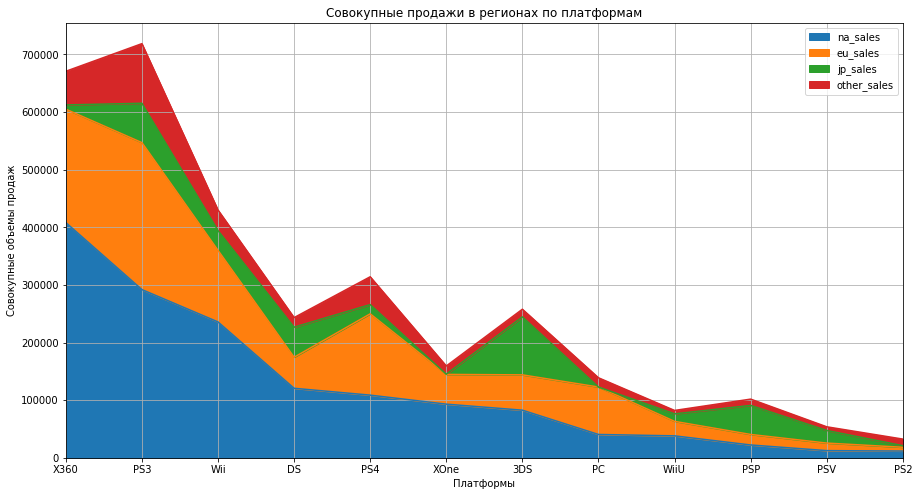

In [33]:
test_regions = actual_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
ax = test_regions.sort_values(by='na_sales', ascending=False).plot.area(
    figsize=(15, 8),
    grid=True,
    xticks=np.arange(12),
# An error occured. Ancient pandas version.
#     color={'na_sales':'pink', 'eu_sales':'green', 'jp_sales':'red', 'other_sales':'grey'},
    title='Совокупные продажи в регионах по платформам'
#     xlabel='Платформы',
#     ylabel='Совокупный объем продаж'
)
ax.set_xlabel('Платформы')
ax.set_ylabel('Совокупные объемы продаж')
print(
    'Топ-5 самых продаваемых платформ во всех регионах:', 
    test_regions.sum(axis=1).sort_values(ascending=False).index[:5].to_list()
)

- Платформа 'PS4' уже набирает популярность в Европпе

### Популярные жанры

Топ-5 жанров:  ['Action', 'Shooter', 'Sports', 'Misc', 'Role-Playing']


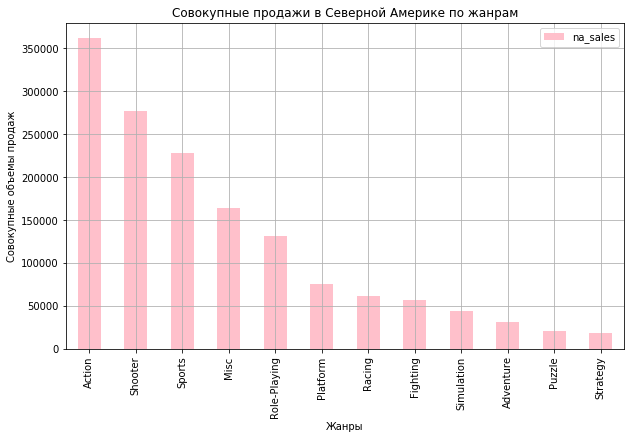

In [34]:
na_genre = actual_data[['genre', 'na_sales']].groupby('genre').sum()
na_genre = na_genre.sort_values(by='na_sales', ascending=False)
ax = na_genre.plot.bar(
    grid=True,
    figsize=(10, 6),
    title='Совокупные продажи в Северной Америке по жанрам',
#     xlabel='Жанры',
#     ylabel='Совокупный объем продаж',
    color='pink'
)
ax.set_xlabel('Жанры')
ax.set_ylabel('Совокупные объемы продаж')
print('Топ-5 жанров: ', na_genre.index[:5].to_list())

В Северной Амерке топ-5 жанров по объему продаж составляют:  ['Action', 'Shooter', 'Sports', 'Misc', 'Role-Playing'].

Топ-5 жанров:  ['Action', 'Shooter', 'Sports', 'Misc', 'Role-Playing']


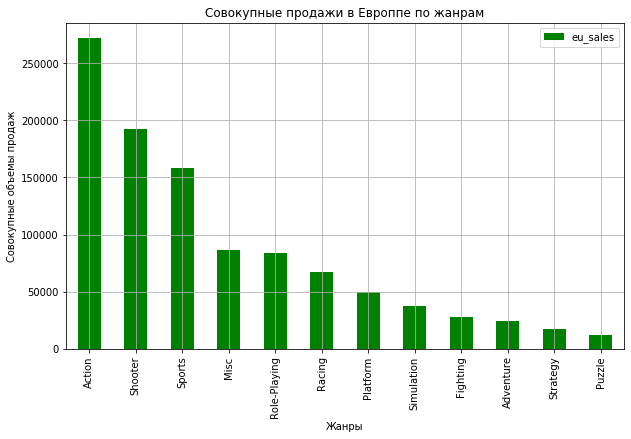

In [35]:
eu_genre = actual_data[['genre', 'eu_sales']].groupby('genre').sum()
eu_genre = eu_genre.sort_values(by='eu_sales', ascending=False)
ax = eu_genre.plot.bar(
    grid=True,
    figsize=(10, 6),
    title='Совокупные продажи в Европпе по жанрам',
#     xlabel='Жанры',
#     ylabel='Совокупный объем продаж',
    color='green'
)
ax.set_xlabel('Жанры')
ax.set_ylabel('Совокупные объемы продаж')
print('Топ-5 жанров: ', eu_genre.index[:5].to_list())

Европейские топ-5 жанров по объему продаж составляют: ['Action', 'Shooter', 'Sports', 'Misc', 'Role-Playing']. При чем первые три имеют более высокую прибыль.

Топ-5 жанров:  ['Role-Playing', 'Action', 'Misc', 'Sports', 'Platform']


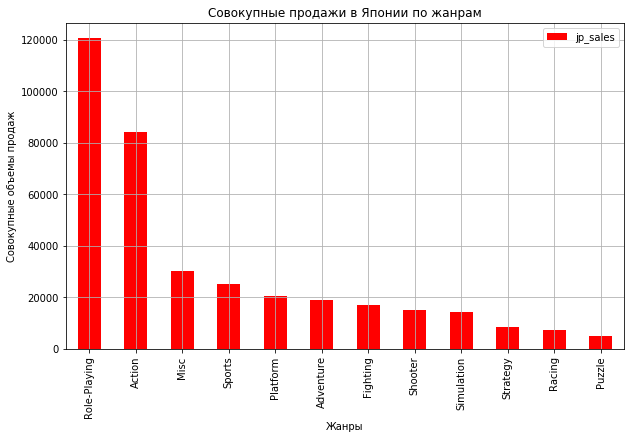

In [36]:
jp_genre = actual_data[['genre', 'jp_sales']].groupby('genre').sum()
jp_genre = jp_genre.sort_values(by='jp_sales', ascending=False)
ax = jp_genre.plot.bar(
    grid=True,
    figsize=(10, 6),
    title='Совокупные продажи в Японии по жанрам',
#     xlabel='жанры',
#     ylabel='Совокупный объем продаж',
    color='red'
)
ax.set_xlabel('Жанры')
ax.set_ylabel('Совокупные объемы продаж')
print('Топ-5 жанров: ', jp_genre.index[:5].to_list())

В Японии топ-5 жанров по объему продаж составляют: ['Role-Playing', 'Action', 'Misc', 'Sports', 'Platform']. При чем первые два наиболее прибыльные.

Топ-5 жанров:  ['Action', 'Shooter', 'Sports', 'Misc', 'Role-Playing']


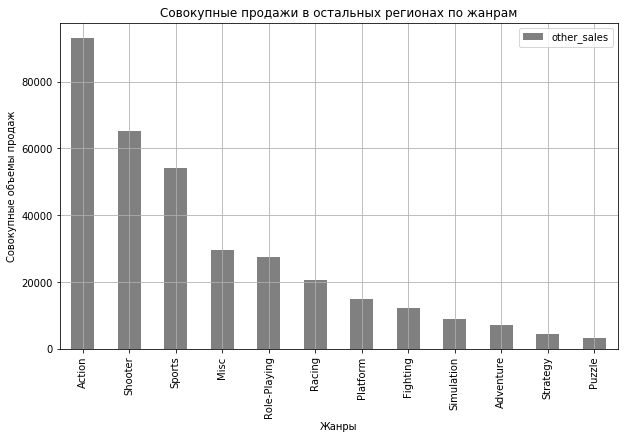

In [37]:
other_genre = actual_data[['genre', 'other_sales']].groupby('genre').sum()
other_genre = other_genre.sort_values(by='other_sales', ascending=False)
ax = other_genre.plot.bar(
    grid=True,
    figsize=(10, 6),
    title='Совокупные продажи в остальных регионах по жанрам',
#     xlabel='Жанры',
#     ylabel='Совокупный объем продаж',
    color='grey'
)
ax.set_xlabel('Жанры')
ax.set_ylabel('Совокупные объемы продаж')
print('Топ-5 жанров: ', other_genre.index[:5].to_list())

В остальных регионах топ-5 жанров по объему продаж составляют:  ['Action', 'Shooter', 'Sports', 'Misc', 'Role-Playing']. При чем первая тройка наиболее прибыльная. 

Топ-5 самых продаваемых жанров во всех регионах: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']


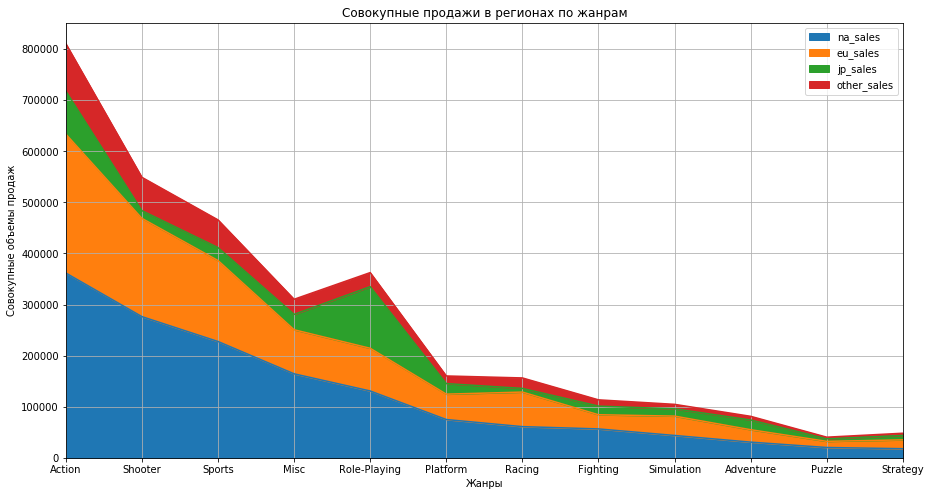

In [38]:
test_regions = actual_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
ax = test_regions.sort_values(by='na_sales', ascending=False).plot.area(
    figsize=(15, 8),
    grid=True,
    xticks=np.arange(12),
#     color={'na_sales':'pink', 'eu_sales':'green', 'jp_sales':'red', 'other_sales':'grey'},
    title='Совокупные продажи в регионах по жанрам',
#     xlabel='Жанры',
#     ylabel='Совокупный объем продаж'
)
ax.set_xlabel('Жанры')
ax.set_ylabel('Совокупные объемы продаж')
print(
    'Топ-5 самых продаваемых жанров во всех регионах:', 
    test_regions.sum(axis=1).sort_values(ascending=False).index[:5].to_list()
)

Большую часть прибыли по игровой индустрии приносят пользователи из северной америки. А в японии больше остальных любят жанр ролевых игр.

### Ретинг ESRB

Топ-5 самых продаваемых рейтингов ESRB во всех регионах: ['M', 'E', 'T', 'E10+', 'EC']
Количество игр с указанными рейтингами:
E       1373
T       1106
M        841
E10+     797
EC         6
RP         1
Name: rating, dtype: int64


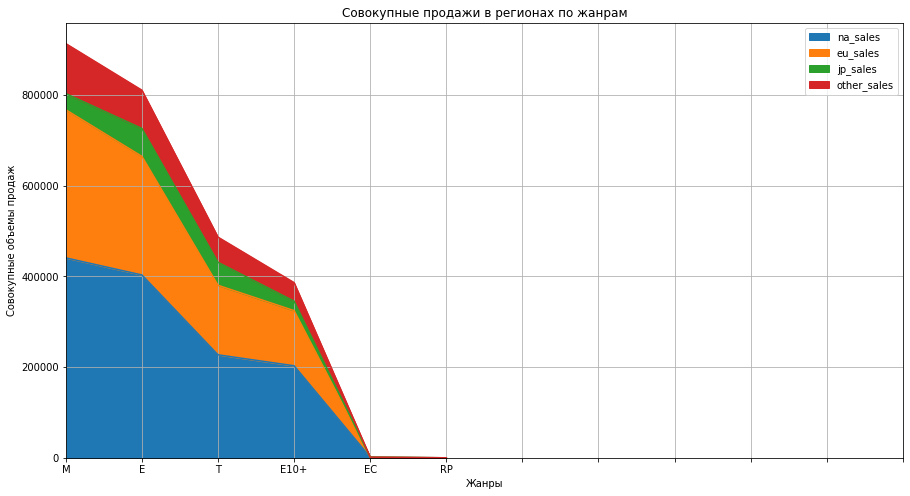

In [39]:
test_regions = actual_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
ax = test_regions.sort_values(by='na_sales', ascending=False).plot.area(
    figsize=(15, 8),
    grid=True,
    xticks=np.arange(12),
#     color={'na_sales':'pink', 'eu_sales':'green', 'jp_sales':'red', 'other_sales':'grey'},
    title='Совокупные продажи в регионах по жанрам',
#     xlabel='Жанры',
#     ylabel='Совокупный объем продаж'
)
ax.set_xlabel('Жанры')
ax.set_ylabel('Совокупные объемы продаж')
print(
    'Топ-5 самых продаваемых рейтингов ESRB во всех регионах:', 
    test_regions.sum(axis=1).sort_values(ascending=False).index[:5].to_list()
)
print(
    'Количество игр с указанными рейтингами:',
    actual_data['rating'].value_counts(), sep='\n'
)

Объемы выборок игр с ретигами ['M', 'E', 'T', 'E10+'] сопоставимы. Похоже, что рейтинг ESRB связан с объемом игровых продаж. Игры с ретингами ['M', 'E', 'T', 'E10+'] располагаются в порядке убывания совокупного объема продаж слева направо. Относительно других рейтингов нельзя однозначно сказать за наличием слишком скромного объема данных по ним.


### Выводы

**Топ-5 платформ:**

Регионы|1|2|3|4|5 
---|---|---|---|---|---
Северная Америка|X360|PS3|Wii|DS|PS4
Еврппа|PS3|X360|PS4|Wii|PC
Япония|3DS|PS3|DS|PSP|Wii
Остальные регионы|PS3|X360|PS4|Wii|DS


**Топ-5 Жанров:**

Регионы|1|2|3|4|5
---|---|---|---|---|---
Северная Америка|Action|Shooter|Sports|Misc|Role-Playing
Еврппа|Action|Shooter|Sports|Misc|Role-Playing
Япония|Role-Playing|Action|Misc|Sports|Platform
Остальные регионы|Action|Shooter|Sports|Misc|Role-Playing

- Составлены талицы топ-5 самых прибыльных ировых платформ и жанров в порядке убывания прибыли слева направо.
- Самыми прибыльными платфомами были 'PS3' и 'X360' но их время уже заканчивается, платформы устаревают. На смену им приходят новые. И наиболее прибыльные новые платформы оказались потомками предыдущих лидеров: PS4 и XOne.
- Топ-5 самых продаваемых платформ во всех регионах: ['PS3', 'X360', 'Wii', 'PS4', '3DS'] в порядке убывания прибыли
- Большую часть прибыли по играм приносят пользователи из северной америки.
- Во всех регионах, кроме Японии, ретинг топ-5 жанров составили одни и те же претенденты:  ['Action', 'Shooter', 'Sports', 'Misc', 'Role-Playing'] в порядке убывания прибыли слева направо.
- А в японии больше остальных любят жанр ролевых игр, и вообще рейтинг самых прибыльных жанров отличается от остальных регионов.
- Топ-5 самых продаваемых жанров во всех регионах: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'] в порядке убывания прибыли

Пользователи всех регионов кроме японии предпочитают игры на платформах ['PS3', 'X360'], жанров ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'] в порядке убывания прибыли.

Пользователи Японии отличаются от пользоватлей остальных регионов. Японцы предпочитают игры на платформах ['3DS', 'PS3'], жанров ['Role-Playing', 'Action', 'Misc', 'Sports', 'Platform'] в порядке убывания прибыли

Рейтинг ESRB влияет на объем игровых продаж. Игры с ретингами ['M', 'E', 'T', 'E10+', 'EC'] располагаются в порядке убывания совокупного объема продаж слева направо. 

## Гипотезы

Для проверки гипотезы о равенстве средних двух выборок, я использую двухсторонний (так как проверка осуществляется в терминах равны/не равны) t-критерий Стьюдента. Т.к. проверка равенства диспресий не производилась я фиксирую параметр equal_var значением False.

### О равенстве средних пользовательских рейтингов платформ Xbox One и PC

In [40]:
print(
    'Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.',
    'Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC НЕ равны.',
    '',
    sep='\n'
)

alpha = .05   
print('Критический уровень статистической значимости: {}.'.format(alpha))
print('Если p-value окажется меньше него - отвергнем нулевую гипотезу.')
print()

sample_1 = actual_data.query("platform == 'XOne'")['user_score'].dropna()
sample_2 = actual_data.query("platform == 'PC'")['user_score'].dropna()

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC НЕ равны.

Критический уровень статистической значимости: 0.05.
Если p-value окажется меньше него - отвергнем нулевую гипотезу.

p-значение: 0.2985617873396985
Не получилось отвергнуть нулевую гипотезу


### О равенстве средних пользовательских рейтингов жанров Action и Sports

In [41]:
print(
    'Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.',
    'Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports НЕ равны.',
    '',
    sep='\n'
)

alpha = .05   
print('Критический уровень статистической значимости: {}.'.format(alpha))
print('Если p-value окажется меньше него - отвергнем нулевую гипотезу.')
print()

sample_1 = actual_data.query("genre == 'Action'")['user_score'].dropna()
sample_2 = actual_data.query("genre == 'Sports'")['user_score'].dropna()

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports НЕ равны.

Критический уровень статистической значимости: 0.05.
Если p-value окажется меньше него - отвергнем нулевую гипотезу.

p-значение: 3.493323839142224e-13
Отвергаем нулевую гипотезу


### Выводы

- Гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC отвергнуть не удалось.
- Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports была отвергнута.

## Общий вывод

- С 2009 года наблюдается переломный момент в игровой индустрии. Происходит смена тренда количества производимых игр. Это может быть связано с кардинальной переменой интересов аудитории или кризисом технологий, а может и другими причинами.
- Средний срок жизни платформы по всем данным: 7.0 лет
- Средний срок жизни топовых платформ: 11.0 лет
- Среди новых перспективных для инвестиций игровых платформ я выделил 'PS4' и 'Xbox One'. По моей интерпретации результатов анализа, эти платформы станут следующими лидерами продаж. Кроме того они являются прямыми наследниками уходящих со сцены лидеров рынка, по результатам анализа: 'PS3' и 'X360' от тех же производителей. Платформа 'PS4' уже набирает популярность в Европпе
- На основе анализа был описан портрет типичного пользователя по регионам. Соостветсвующие таблицы можно посмотреть в выводах к главе 5. Исключая Японию, пользователи всех регионов предпочитают игры на платформах ['PS3', 'X360'], жанров ['Role-Playing', 'Action', 'Misc', 'Sports', 'Platform'] в порядке убывания прибыли. Японцы же отдают голоса в пользу платформ ['3DS', 'PS3'] и жанрам ['Role-Playing', 'Action', 'Misc', 'Sports', 'Platform'] в порядке убывания прибыли.
- В ходе анализ установлено, что совокупный объем продаж зависит от рейтингов ESRB. Игры можно расположить по рейтингу топ-4 ESRB в порядке убывания совокупной прибыли следующим образом: ['M', 'E', 'T', 'E10+']
- Гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC отвергнуть не удалось.
- Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports была отвергнута.

Для инвестиций предлагаются платформы 'PS4' и 'Xbox One'. При возможности продавижения только одной платформы, рекомендуется 'PS4'.